In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_theme(style="ticks", palette="deep")

from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import ruamel.yaml as yaml
import torch
import scipy.stats as stats

from soul_gan.datasets.utils import get_dataset, prepare_2d_gaussian_grid_data, prepare_2d_ring_data

from soul_gan.utils.general_utils import DotConfig, CONFIGS_DIR, DATA_DIR
from soul_gan.models.utils import GANWrapper

2022-03-30 11:20:31.226411: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
config = DotConfig(yaml.round_trip_load(Path(CONFIGS_DIR, 'gan_configs/grid-js-mlp.yml').open('r'))).gan_config

mean = np.array(config.train_transform.Normalize.mean)
std = np.array(config.train_transform.Normalize.std)

In [3]:
mean, std

(array([0., 0.]), array([1.415, 1.415]))

In [4]:
sigma = 0.05
n_modes = 25
sample, modes = prepare_2d_gaussian_grid_data(int(5e3), sigma=sigma, n_modes=n_modes)

dists = np.linalg.norm(modes[:, None] - modes[None, :], ord=2, axis=-1)
dists += dists.max() * np.eye(dists.shape[0])
eps = dists.min(-1)

np.savez(
    Path(DATA_DIR, f'{n_modes}_gaussians_modes.npz').open('wb'), 
    centroids=(modes - mean[None, :]) / std[None, :], 
    closest_pts=(modes - mean[None, :]) / std[None, :], 
    sigmas=np.ones(len(modes))*sigma / std[0],
    priors=np.ones(len(modes)) / len(modes),
    eps=eps)


In [5]:
kind = 'grid'

dataset = get_dataset(f"gaussians_{kind}", int(1e4))
# dataset[0]


In [6]:
kind = ''

In [70]:
# def plot(target, feature, step_size, suffix='', step=1000):
#     path = Path(f'../log/{feature}_{target}Target/mlp_{kind}{suffix}_{step_size}')
#     xs = np.load(Path(path, f'images/{step}.npy'))

#     plt.figure(figsize=(4, 4)) #(5, 5))
#     plt.scatter(xs[:, 0], xs[:, 1], alpha=0.1, s=10)

#     plt.scatter(modes[:, 0], modes[:, 1], color='r', marker='x')
    
#     plt.axis('equal')
#     plt.grid()

#     Path(path, 'figs').mkdir(exist_ok=True)
#     plt.savefig(Path(path, f'figs/{kind}{suffix}_{step_size}_2d_{step}.png'))

#     emd = np.loadtxt(Path(path, 'callback_results.txt'))[2, -1]
#     print(emd)


import matplotlib.image as mpimg

def plot(target, feature, step_size, suffix='', step=1000):
    path = Path(f'../log/{feature}_{target}Target/mlp_{kind}{suffix}_{step_size}')

    fig_path = Path(path, 'figs', f'mlp_{kind}{suffix}_{step_size}_2d_{step}.png')
    im = mpimg.imread(fig_path)
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.axis('off')

    emd = np.loadtxt(Path(path, 'EMD.txt'))[:, 0 if step == 0 else 1]
    std = emd.std(ddof=1)
    emd = emd.mean()
    print(fr'{emd:.3f} ± {2*std:.3f}')

## Wasserstein GAN

In [71]:
model = 'wass'

0.260 ± 0.034


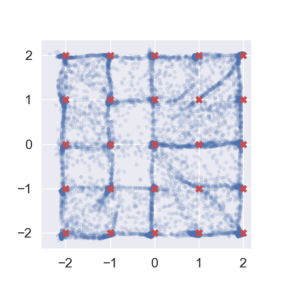

In [72]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'dumb_feature'

plot(target, feature, step_size, step=0, suffix=suffix)

0.251 ± 0.038


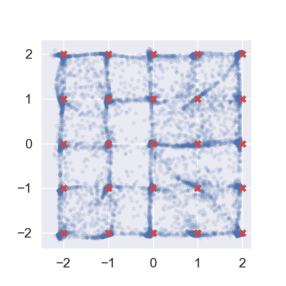

In [73]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'dumb_feature'

plot(target, feature, step_size, step=1000, suffix=suffix)

0.233 ± 0.019


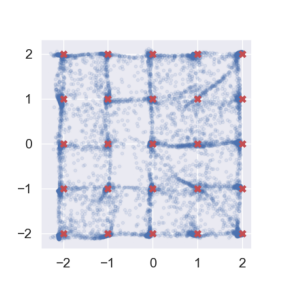

In [74]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix)


In [75]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_dis')


0.296 ± 0.093


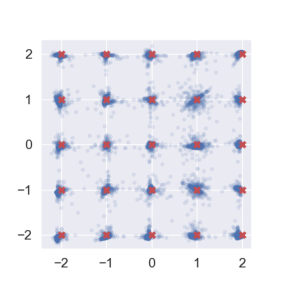

In [76]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'discriminator_feature'

plot(target, feature, step_size, step=1000, suffix=suffix)


0.243 ± 0.034


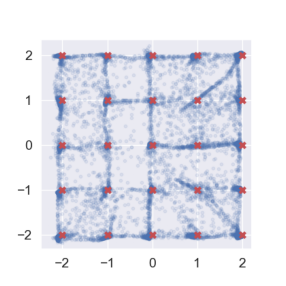

In [77]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v1')

0.237 ± 0.016


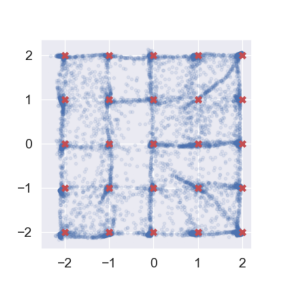

In [78]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v1_dis')

0.254 ± 0.025


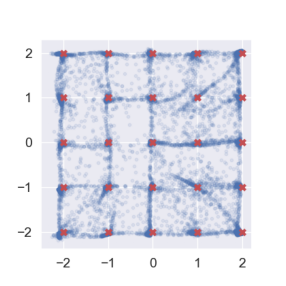

In [79]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v2')

In [80]:
# suffix = model
# step_size = 0.0001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_lin')

In [81]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_quad')

0.230 ± 0.016


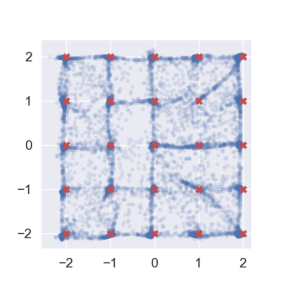

In [82]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_dis')

In [83]:
# suffix = model
# step_size = 0.0001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_lin_dis')

In [84]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_quad_dis')

In [85]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v3')

In [86]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v3_dis')

0.276 ± 0.040


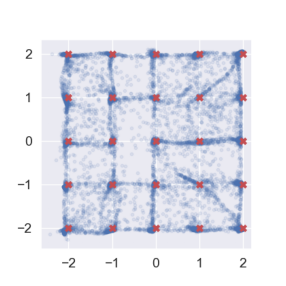

In [87]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'mmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'')

In [88]:
# suffix = model
# step_size = 0.0001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_lin')

In [89]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_quad')

0.252 ± 0.044


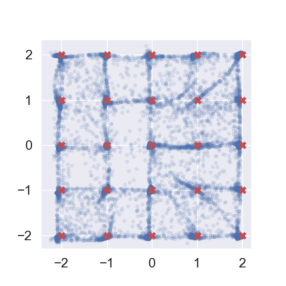

In [90]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'mmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_dis')

In [91]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_lin_dis')

In [92]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_quad_dis')

0.246 ± 0.019


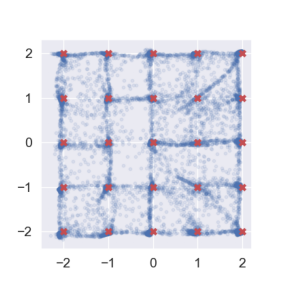

In [93]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'')

0.215 ± 0.005


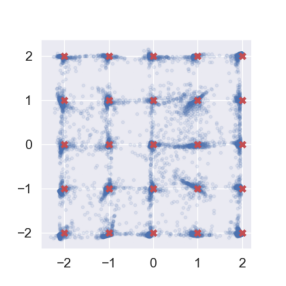

In [94]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_dis')

In [ ]:
device = torch.device(0)

config = DotConfig(yaml.round_trip_load(Path(CONFIGS_DIR, 'gan_configs/grid-wass-mlp.yml').open('r'))).gan_config
gan = GANWrapper(config, device)
gen, dis = gan.gen, gan.dis

In [ ]:
n_pts_ax = 100
n_kde_pts = 50000
latent_grid = np.meshgrid(np.linspace(-3, 3, n_pts_ax), np.linspace(-3, 3, n_pts_ax))
real_grid = np.meshgrid(np.linspace(-2.5, 2.5, n_pts_ax), np.linspace(-2.5, 2.5, n_pts_ax))

zs = gen.prior.sample((n_kde_pts,))
xs_normalized = gen(zs)
xs = gen.inverse_transform(xs_normalized).detach().cpu().numpy()
dgz = dis(xs_normalized).squeeze().detach().cpu().numpy()

reals = torch.from_numpy(np.stack(real_grid, -1).reshape(-1, 2)).to(device).float()
dgz_ = dis(dis.transform(reals)).squeeze()

reals_np = reals.detach().cpu().numpy()

In [ ]:
dgz_.mean(), dgz.mean()

In [ ]:
dis(dis.transform(torch.as_tensor(sample).to(device))).mean()

In [ ]:
kde = stats.kde.gaussian_kde(xs.transpose(1, 0))
log_probs = kde.logpdf(reals_np.transpose(1, 0))

In [ ]:
energy = (log_probs + dgz_.detach().cpu().numpy())
energy_grid = energy.reshape(n_pts_ax, n_pts_ax)
#Path('../figs/100gaussians').mkdir(exist_ok=True)

xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], energy_grid, levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$-\hat{E}(x) = \log p_G(x) + d(x)$')
#plt.savefig(Path('../figs/100gaussians', 'minus_energy_sigma_0.025.png'))

In [ ]:
xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], log_probs.reshape(n_pts_ax, n_pts_ax), levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$\log p_G(x)$')
# plt.savefig(Path('../figs/100gaussians', 'log_prob_0.025.png'))

In [ ]:
xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], dgz_.detach().cpu().numpy().reshape(n_pts_ax, n_pts_ax), levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$d(x)$')
# plt.savefig(Path('../figs/100gaussians', 'dgz_0.025.png'))

In [ ]:
zs = gen.prior.sample((10000,))
xs_normalized = gen(zs)
xs = gen.inverse_transform(xs_normalized).detach().cpu().numpy()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(xs[:, 0], xs[:, 1], s=20, alpha=0.1)
ax.set_aspect('equal')
plt.grid()
plt.title('Points produced by Generator')
# plt.savefig(Path('../figs/100gaussians', 'gen_0.025.png'))

## Jensen-Shannon GAN

In [95]:
model = 'js'

0.373 ± 0.071


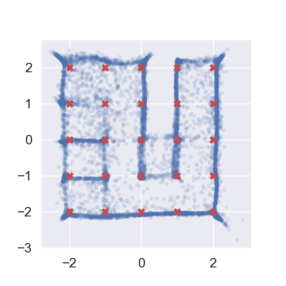

In [96]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'dumb_feature'

plot(target, feature, step_size, step=0, suffix=suffix)

0.433 ± 0.117


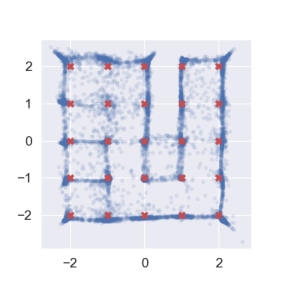

In [97]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'dumb_feature'

plot(target, feature, step_size, step=1000, suffix=suffix)

0.311 ± 0.038


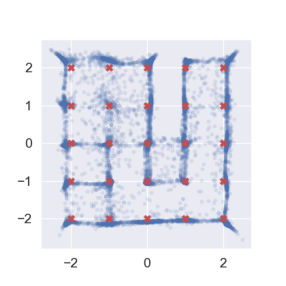

In [98]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix)


0.347 ± 0.065


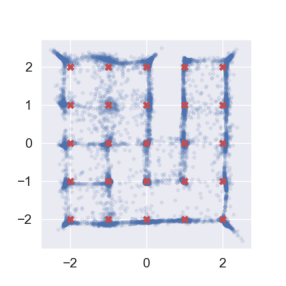

In [99]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_dis')


0.437 ± 0.045


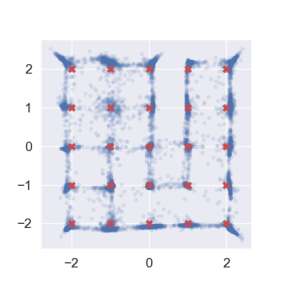

In [100]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'discriminator_feature'

plot(target, feature, step_size, step=1000, suffix=suffix)


0.352 ± 0.020


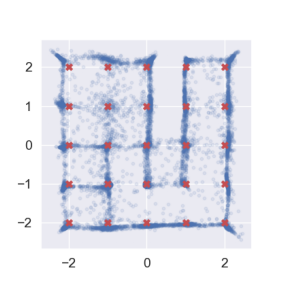

In [101]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v1')

0.355 ± 0.009


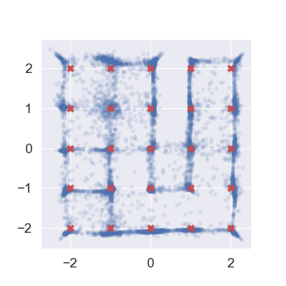

In [102]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v1_dis')

0.314 ± 0.028


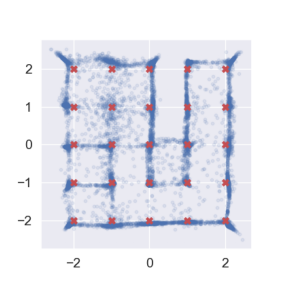

In [103]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v2')

In [104]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_lin')

In [105]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_quad')

0.301 ± 0.030


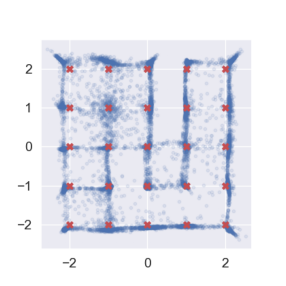

In [106]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cluster_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_dis')

In [107]:
# suffix = model
# step_size = 0.0001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_lin_dis')

In [108]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v2_quad_dis')

In [109]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v3')

In [110]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'cluster_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_v3_dis')

0.410 ± 0.061


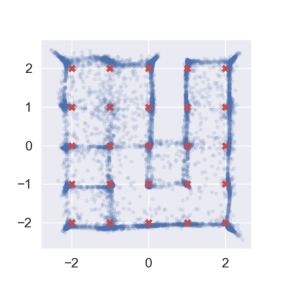

In [111]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'mmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'')

In [112]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_lin')

In [113]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_quad')

0.360 ± 0.084


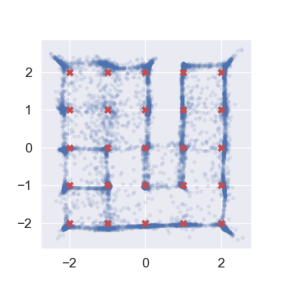

In [114]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'mmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_dis')

In [115]:
# suffix = model
# step_size = 0.0001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_lin_dis')

In [116]:
# suffix = model
# step_size = 0.001
# target = 'Discriminator'
# feature = 'mmd_feature'

# plot(target, feature, step_size, step=1000, suffix=suffix+'_quad_dis')

0.306 ± 0.044


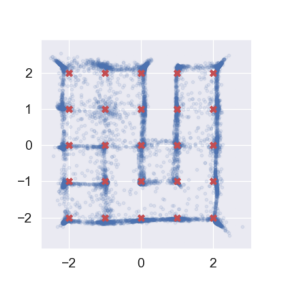

In [117]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'')

0.297 ± 0.027


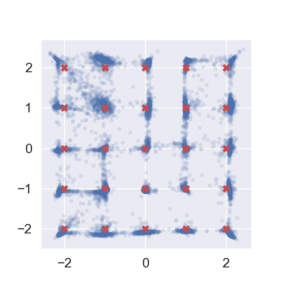

In [118]:
suffix = model
step_size = 0.0001
target = 'Discriminator'
feature = 'cmd_feature'

plot(target, feature, step_size, step=1000, suffix=suffix+'_dis')

In [308]:
device = torch.device(0)

config = DotConfig(yaml.round_trip_load(Path(CONFIGS_DIR, 'gan_configs/grid-js-mlp.yml').open('r'))).gan_config
gan = GANWrapper(config, device)
gen, dis = gan.gen, gan.dis

In [ ]:
n_pts_ax = 100
n_kde_pts = 50000
latent_grid = np.meshgrid(np.linspace(-3, 3, n_pts_ax), np.linspace(-3, 3, n_pts_ax))
real_grid = np.meshgrid(np.linspace(-2.5, 2.5, n_pts_ax), np.linspace(-2.5, 2.5, n_pts_ax))

zs = gen.prior.sample((n_kde_pts,))
xs_normalized = gen(zs)
xs = gen.inverse_transform(xs_normalized).detach().cpu().numpy()
dgz = dis(xs_normalized).squeeze().detach().cpu().numpy()

reals = torch.from_numpy(np.stack(real_grid, -1).reshape(-1, 2)).to(device).float()
dgz_ = dis(dis.transform(reals)).squeeze()

reals_np = reals.detach().cpu().numpy()

In [ ]:
dgz_.mean(), dgz.mean()

In [ ]:
kde = stats.kde.gaussian_kde(xs.transpose(1, 0))
log_probs = kde.logpdf(reals_np.transpose(1, 0))

In [ ]:
energy = (log_probs + dgz_.detach().cpu().numpy())
energy_grid = energy.reshape(n_pts_ax, n_pts_ax)

xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], energy_grid, levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$-\hat{E}(x) = \log p_G(x) + d(x)$')

In [ ]:
xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], log_probs.reshape(n_pts_ax, n_pts_ax), levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$\log p_G(x)$')
# plt.savefig(Path('../figs/100gaussians', 'log_prob_0.025.png'))

In [ ]:
xs_grid = reals_np.reshape(n_pts_ax, n_pts_ax, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
im = ax.contourf(xs_grid[..., 0], xs_grid[..., 1], dgz_.detach().cpu().numpy().reshape(n_pts_ax, n_pts_ax), levels=50)
fig.colorbar(im)
ax.set_aspect('equal')
plt.title(r'$d(x)$')
# plt.savefig(Path('../figs/100gaussians', 'dgz_0.025.png'))

In [ ]:
zs = gen.prior.sample((10000,))
xs_normalized = gen(zs)
xs = gen.inverse_transform(xs_normalized).detach().cpu().numpy()

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
ax.scatter(xs[:, 0], xs[:, 1], s=20, alpha=0.1)
ax.set_aspect('equal')
plt.grid()
plt.title('Points produced by Generator')
# plt.savefig(Path('../figs/100gaussians', 'gen_0.025.png'))